






<h1><font color="#004D7F" size=6>Análisis de componentes principales</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Maite Alonso</font><br>
<font color="#004D7F" size=3>Máster universitario en ingenieria informática</font><br>
<font color="#004D7F" size=3>Universidad de Castilla-La Mancha</font>

</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>


* [1. Análisis de componentes](#section1)
    * [¿Qué es una componente principal?](#section1A)
    * [Normalización](#section1B)
* [2. Caso de estudio](#section2)
    * [Cargar datos](#section2A)
    * [Análisis de datos](#section2B)
    * [Análisis componentes principales](#section2C)
    * [Elección del número de componentes](#section2D)
    * [Rotación](#section2E)
* [3. Análisis discriminantes](#section3)
* [4. Comparativa PCA vs LDA](#section4)

El análisis de componentes es una técnica de análisis bivariado, cuyo objetivo es la reducción de variables. Muchas veces tenemos una serie de variables que miden lo mismo y por tanto están fuertemente correladas.

 La idea de la técnica es agrupar variables, en componentes, fuertemente correladas entre sí y que esas componentes sean independientes entre sí. Buscando el número mínimo de componentes capaz de explicar la máxima cantidad de información.

Esta técnica sólo se puede aplicar a variables cuantitativas. Siempre y cuando las observaciones sean independentes

Imaginaros que tenemos un banco de datos de 500 observaciones y 60 variables. Solo para ver la relación entre variables tendríamos que hacer 1770 diagramas de dispersión. En cambio si escogemos un subconjunto de esas 60 variables que capturen la  mayor cantidad de información, no tendríamos que hacer tantos diagramas y sería más manejable.

Partimos de un conjunto de variables(𝑥1,…,𝑥n) que vamos a sustituir por t componentes principales (𝑝1,…,𝑝𝑡), independientes entre si. Estas t componentes principales son combinación lineal de las n variables originales.

En la imagen de abajo, hemos rotado los datos originales en la dirección de mayor varianza de los datos. La componente principal 1, representa la dirección de mayor variabilidad de los datos y la componente 2 la mayor varianza restante, ortogonal a la primera componente.


<img src="./img/acp1.jpg" alt="img1" align="right">


<a id="section1A"></a>
<h2>1.1 ¿Qué es una componente principal?</h2>

Es una combinación lineal de las variable originales.
La primera componente capturará la mayor varianza del conjunto de datos, lo que determina la dirección de mayor variabilidad. Esta componente es la que más información captura.

$CP1=a_{11}*x_{1}+a_{12}*x_{2}+...+a_{1n}*x_{n}$

La segunda compnente también es una combinación lineal de las variables originales y debe estar incorrelada con la componente 1, por tanto sus direcciones serán ortogonales.

$CP2=a_{21}*x_{1}+a_{22}*x_{2}+...+a_{2n}*x_{n}$

Se calcularán el menor número de componentes que explique la mayor variabilidad.

<a id="section1B"></a>
<h2> 1.2 Normalización de los datos </h2>

Los datos deben de estar normalizados puesto que las variables pueden estar en escalas diferentes y esto implica mayor varianza entre variables.

$\frac{valor-media}{desviación}$

<a id="section2"></a>
<h2> 2. Caso de estudio </h2>

<a id="section2A"></a>
<h2>2.1 Cargar datos</h2>

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

iris = pd.read_csv("./datos/iris.csv",sep=',')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<a id="section2B"></a>
<h2>2.2 Análisis de datos </h2>

In [4]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


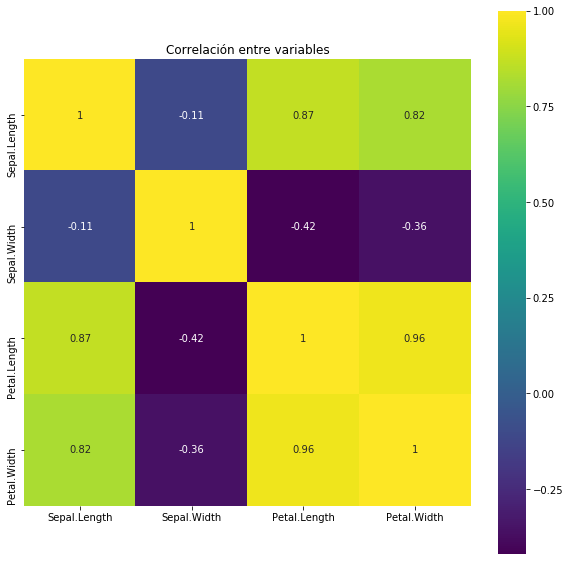

In [5]:
#las separo en X las variables y en Y las categorias
X = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values
correlation = iris.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlación entre variables')

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

Dibujo las distribuciones por escpecie y variable

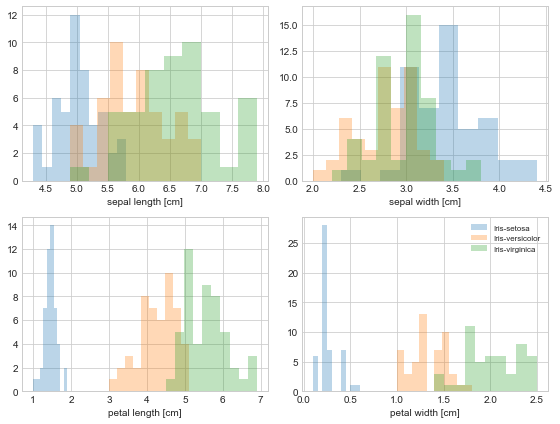

In [5]:
from matplotlib import pyplot as plt
import numpy as np
import math

label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}
feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right',  fontsize=8)
    plt.tight_layout()
    plt.show()

<a id="section2C"></a>
<h2>2.3 Análisis de Componentes Principales</h2>

In [52]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [26]:
from sklearn.decomposition import PCA
mipca = PCA(n_components=4)
mipca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
#Las componentes principales
print(mipca.components_)

[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
 [-0.26199559  0.12413481  0.80115427 -0.52354627]]


In [16]:
#Varianza recogida por cada componente y el % de varianza que recoge cada componente
print(mipca.explained_variance_)
print(mipca.explained_variance_ratio_)

[ 2.93035378  0.92740362  0.14834223  0.02074601]
[ 0.72770452  0.23030523  0.03683832  0.00515193]


<a id="section2D"></a>
<h2>2.4 Elección número de componentes </h2>

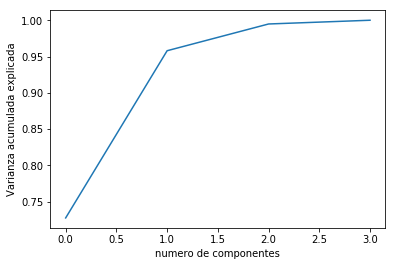

In [23]:
plt.plot(np.cumsum(mipca.explained_variance_ratio_))
plt.xlabel('numero de componentes')
plt.ylabel('Varianza acumulada explicada');
plt.show()

In [27]:
    mipca2 = PCA(n_components=2)
    mipca2.fit(X_std)
    X_r = mipca2.fit(X_std).transform(X_std)

<a id="section2E"></a>
<h2>2.5 Rotación </h2>

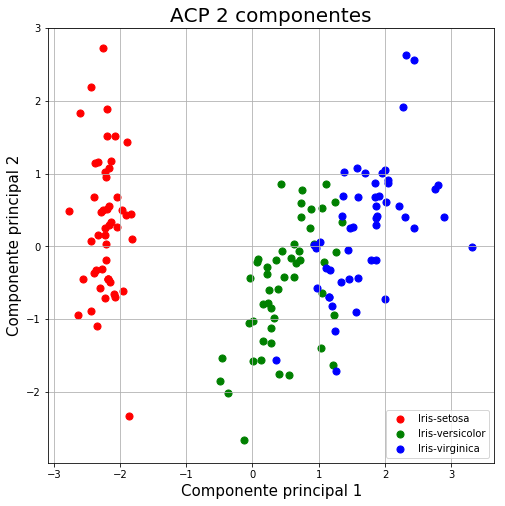

In [29]:
principalComponents = mipca2.fit_transform(X_std)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1','PC2'])
finalDf = pd.concat([principalDf, iris[['Species']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente principal 1', fontsize = 15)
ax.set_ylabel('Componente principal 2', fontsize = 15)
ax.set_title('ACP 2 componentes', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

<a id="section3"></a>
<h2>3. Análisis de discriminantes </h2>

El análisis discriminante (LDA) es una técnica para tratar de encontrar las variables que permiten diferenciar a los grupos y cuántas de estas variables son necesarias para alcanzar la mejor clasificación posible. 

La pertenencia a los grupos, conocida de antemano, se utiliza como variable dependiente (una variable categórica con tantos valores discretos como grupos). Las variables en las que suponemos que se diferencian los grupos se utilizan como variables independientes o variables de clasificación (variables discriminantes).

El objetivo del análisis discriminante es encontrar la combinación lineal de las variables discriminantes que mejor permita diferenciar (discriminar) a los grupos.
 Una vez encontrada esa combinación (la función discriminante) podrá ser utilizada para clasificar nuevos casos. 
    
Se trata de una técnica de análisis multivariante capaz de aprovechar las relaciones existentes entre una gran cantidad de variables independientes para maximizar la capacidad de discriminación.


In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X_std, y).transform(X_std)
lda.scalings_

array([[-0.67614337,  0.0271192 ],
       [-0.66890811,  0.93115101],
       [ 3.84228173, -1.63586613],
       [ 2.17067434,  2.13428251]])

In [54]:
lda.explained_variance_ratio_

array([ 0.99147248,  0.00852752])

NameError: name 'X_r2' is not defined

<a id="section4"></a>
<h2>4. Anáisis de discriminantes vs Análisis de componentes principales</h2>

PCA, son técnicas de trasformación lineal que se usan para reducir la dimensionalidad. Se describe como un algoritmo no supervisado , ya que ignora las clases y tiene como objeto encontrar la dirección que maximizar la varianza del conjunto de datos.

LDA es una técnica supervisada, puesto que calcula la dirección de los ejes que maximiza la separación entre múltiples clases.


<a id="section4A"></a>
<h2>4.1 Comparación PCA vs LDA </h2>

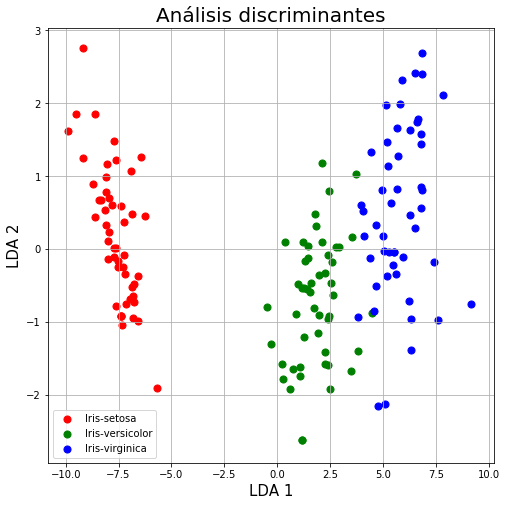

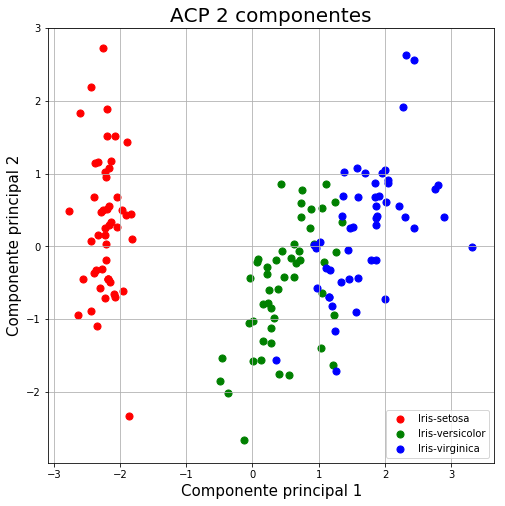

In [47]:
#principalComponents = mipca2.fit_transform(X_std)
principalDf = pd.DataFrame(data = X_r2, columns = ['LDA1','LDA2'])
finalDf = pd.concat([principalDf, iris[['Species']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('LDA 1', fontsize = 15)
ax.set_ylabel('LDA 2', fontsize = 15)
ax.set_title('Análisis discriminantes', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'LDA1']
               , finalDf.loc[indicesToKeep, 'LDA2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

principalComponents = mipca2.fit_transform(X_std)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1','PC2'])
finalDf = pd.concat([principalDf, iris[['Species']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente principal 1', fontsize = 15)
ax.set_ylabel('Componente principal 2', fontsize = 15)
ax.set_title('ACP 2 componentes', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()